# The following is a predictive model trained using a dataset of IPL ball-by-ball action between 2008-2020.

In [50]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')

#Data preprocessing
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#For modeling
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, mean_squared_error,r2_score,mean_absolute_error, roc_curve,roc_auc_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("C:/Users/Aditya/Desktop/BSE PGPDA/SEM 2/Indrani - Regression and Classification of Business Applications/IPL Ball-by-Ball 2008-2020.csv")

In [3]:
df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
df.drop('id',axis=1,inplace=True)

In [5]:
df.head()

,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [6]:
df.isna().sum()

inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [7]:
df.groupby(["non_boundary","total_runs"]).first()

inning  over  ball      batsman       non_striker  \
non_boundary total_runs                                                      
0            0                1     7     1  BB McCullum        RT Ponting   
             1                1     6     5   RT Ponting       BB McCullum   
             2                1     8     6  BB McCullum        RT Ponting   
             3                1     7     3     JR Hopes  DPMD Jayawardene   
             4                1    10     2   RT Ponting       BB McCullum   
             5                1     3     1  BB McCullum        SC Ganguly   
             6                1     9     5  BB McCullum        RT Ponting   
             7                1    19     6   WPUJC Vaas          RP Singh   
1            4                2     1     3    SM Katich           S Sohal   
             6                1    19     6    LR Shukla         DJ Hussey   

                             bowler  batsman_runs  extra_runs  is_wicket  \
non_boundary total_runs                                                    
0            0               Z Khan             0           0          0   
             1            AA Noffke             1           0          0   
             2            JH Kallis             2           0          0   
             3           D Salunkhe             3           0          0   
             4            JH Kallis             4           0          0   
             5            AA Noffke             0           5          0   
             6             SB Joshi             6           0          0   
             7            VY Mahesh             6           1          0   
1            4           PJ Sangwan             4           0          0   
             6             RP Singh             6           0          0   

                        dismissal_kind player_dismissed  \
non_boundary total_runs                                   
0            0                  caught       RT Ponting   
             1                 run out        AA Noffke   
             2                 run out          A Nehra   
             3                    None             None   
             4            retired hurt           N Rana   
             5                    None             None   
             6            retired hurt     SR Tendulkar   
             7                    None             None   
1            4                    None             None   
             6                    None             None   

                                                       fielder extras_type  \
non_boundary total_runs                                                      
0            0                                         P Kumar        None   
             1                              AB Agarkar,WP Saha       wides   
             2           TM Srivastava,DPMD Jayawardene,U Kaul       wides   
             3                                            None       wides   
             4                                            None        byes   
             5                                            None       wides   
             6                                            None        None   
             7                                            None     noballs   
1            4                                            None        None   
             6                                            None        None   

                                  batting_team                 bowling_team  
non_boundary total_runs                                                      
0            0           Kolkata Knight Riders  Royal Challengers Bangalore  
             1           Kolkata Knight Riders  Royal Challengers Bangalore  
             2           Kolkata Knight Riders  Royal Challengers Bangalore  
             3                 Kings XI Punjab             Rajasthan Royals  
             4           Kolkata Knight Riders  Royal Challen

In [8]:
df.groupby(["is_wicket","total_runs"]).first()

inning  over  ball       batsman       non_striker  \
is_wicket total_runs                                                       
0         0                1     7     1   BB McCullum        RT Ponting   
          1                1     6     5    RT Ponting       BB McCullum   
          2                1     8     6   BB McCullum        RT Ponting   
          3                1     7     3      JR Hopes  DPMD Jayawardene   
          4                1    10     2    RT Ponting       BB McCullum   
          5                1     3     1   BB McCullum        SC Ganguly   
          6                1     9     5   BB McCullum        RT Ponting   
          7                1    19     6    WPUJC Vaas          RP Singh   
1         0                1    12     1    RT Ponting       BB McCullum   
          1                2    11     1     AA Noffke           P Kumar   
          2                2    19     5  CRD Fernando           A Nehra   
          4                2    16     3        N Rana           CA Lynn   
          6                2    11     4  SR Tendulkar        KD Karthik   

                              bowler  batsman_runs  extra_runs  non_boundary  \
is_wicket total_runs                                                           
0         0                   Z Khan             0           0             0   
          1                AA Noffke             1           0             0   
          2                JH Kallis             2           0             0   
          3               D Salunkhe             3           0             0   
          4                JH Kallis             4           0             0   
          5                AA Noffke             0           5             0   
          6                 SB Joshi             6           0             0   
          7                VY Mahesh             6           1             0   
1         0                JH Kallis             0           0             0   
          1               SC Ganguly             1           0             0   
          2                VRV Singh             2           0             0   
          4           Mohammed Siraj             4           0             0   
          6                KV Sharma             6           0             0   

                     dismissal_kind player_dismissed  \
is_wicket total_runs                                   
0         0                    None             None   
          1                    None             None   
          2                    None             None   
          3                    None             None   
          4                    None             None   
          5                    None             None   
          6                    None             None   
          7                    None             None   
1         0                  caught       RT Ponting   
          1                 run out        AA Noffke   
          2                 run out          A Nehra   
          4            retired hurt           N Rana   
          6            retired hurt     SR Tendulkar   

                                                    fielder extras_type  \
is_wicket total_runs                                                      
0         0                                            None        None   
          1                                            None       wides   
          2                                            None       wides   
          3                                            None       wides   
          4                                            None        byes   
          5                                            None       wides   
          6                                            None        None   
          7                                            None     noballs   
1         0                                         P Kumar        None   
          1   

In [9]:
df.shape

(193468, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   inning            193468 non-null  int64 
 1   over              193468 non-null  int64 
 2   ball              193468 non-null  int64 
 3   batsman           193468 non-null  object
 4   non_striker       193468 non-null  object
 5   bowler            193468 non-null  object
 6   batsman_runs      193468 non-null  int64 
 7   extra_runs        193468 non-null  int64 
 8   total_runs        193468 non-null  int64 
 9   non_boundary      193468 non-null  int64 
 10  is_wicket         193468 non-null  int64 
 11  dismissal_kind    9495 non-null    object
 12  player_dismissed  9495 non-null    object
 13  fielder           6784 non-null    object
 14  extras_type       10233 non-null   object
 15  batting_team      193468 non-null  object
 16  bowling_team      193277 non-null  obj

# Looking for all the unique values and their counts in every column

In [11]:
for cols in df:
    print(cols.index,"\n",df[cols].value_counts())

<built-in method index of str object at 0x000001C4A67FAF30> 
 1    100191
2     93277
Name: inning, dtype: int64
<built-in method index of str object at 0x000001C4A67FAEB0> 
 1     10255
0     10254
2     10155
3     10115
4     10092
5     10067
6     10021
7      9993
8      9964
9      9920
10     9864
11     9833
12     9806
13     9712
14     9638
15     9477
16     9358
17     9086
18     8531
19     7327
Name: over, dtype: int64
<built-in method index of str object at 0x000001C4A68003B0> 
 1    31372
2    31285
3    31200
4    31129
5    31032
6    30929
7     5521
8      865
9      135
Name: ball, dtype: int64
<built-in method index of str object at 0x000001C4A6800430> 
 V Kohli                    4609
S Dhawan                   4208
RG Sharma                  4088
SK Raina                   4041
DA Warner                  3819
RV Uthappa                 3658
G Gambhir                  3524
MS Dhoni                   3493
CH Gayle                   3342
AM Rahane               

# Insights

# Top 3 balls faced by on strike batsmen
-V Kohli           4597
-S Dhawan          4194
-RG Sharma         4072

# Top 3 non-strike batsmen
-S Dhawan                   4558
-V Kohli                    4442
-SK Raina                   4160

# Most balls bowled
-Harbhajan Singh            3443
-R Ashwin                   3321
-PP Chawla                  3277

# Runs scored on every ball
0 -   67582
1 -   80231
2 -   13052
3 -     735
4 -   22169
5 -     378
6 -    8843
7 -      53

# Overs where there were more than 6 balls
7 -    5519
8 -     865
9 -     135

# Total wickets taken 
9494

# Wicket Type
caught                   5742(60.4%)
bowled                   1700(17.9%)
run out                   893(9.4%)
lbw                       571(6%)
stumped                   294(3%)
caught and bowled         269(2.8%)
hit wicket                 12(0.12%)
retired hurt               11(0.11%)
obstructing the field       2(0.02%)

# Top 3 Players with most dissmissals
RG Sharma                  167
RV Uthappa                 165
SK Raina                   161

# Top 3 players with most wickets as fielder
MS Dhoni                   164
KD Karthik                 156
RV Uthappa                 123

# Top 3 teams with most balls faced while batting
Mumbai Indians                 24412
Royal Challengers Bangalore    22644
Kings XI Punjab                22585

# Top 3 teams with most balls
Mumbai Indians                 24408
Royal Challengers Bangalore    22993
Kolkata Knight Riders          22526

In [13]:
def display_distribution_plots(df):
    for col in df.columns:
        if df[col].dtype == "object":
            continue
        else:
            sns.distplot(df[col],rug=True)
            plt.title(f"Distribution Plot for Column: {col}")
            plt.xlabel("Values")
            plt.ylabel("Density")
            plt.show()

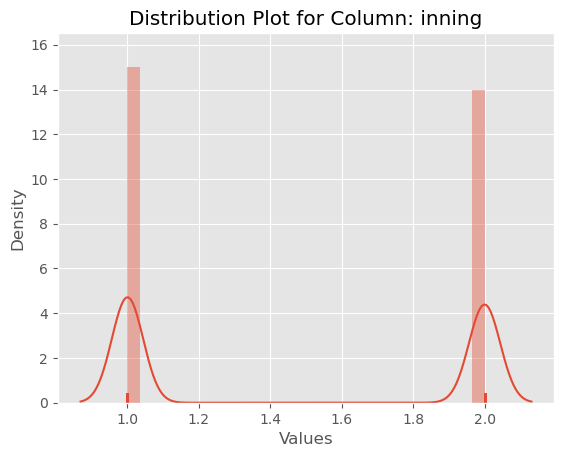

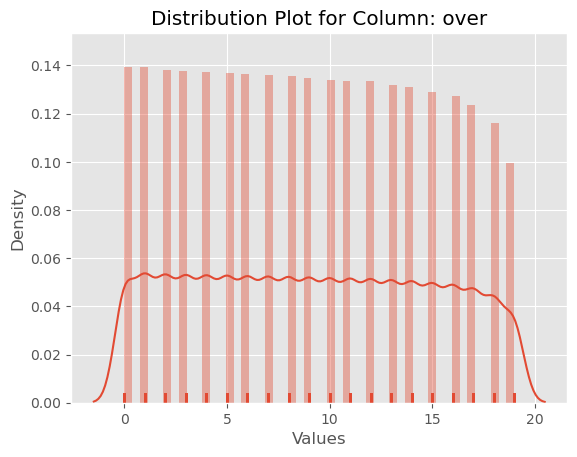

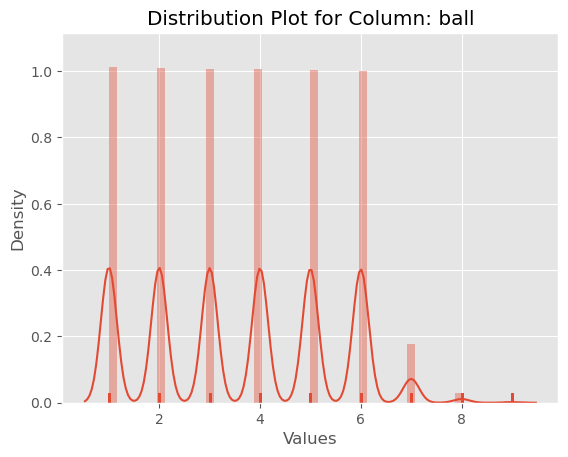

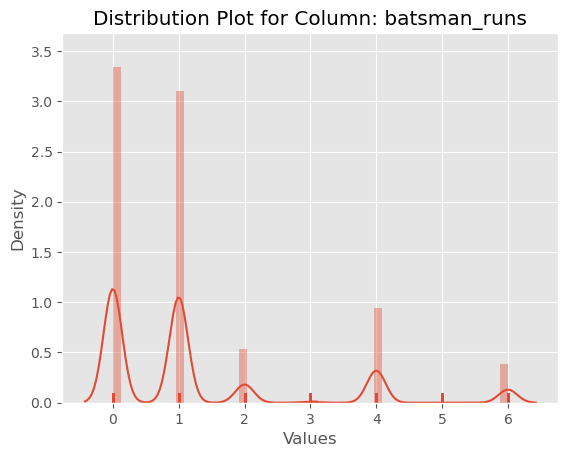

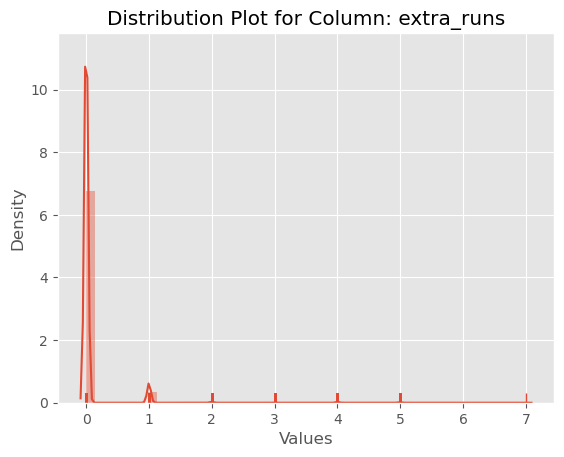

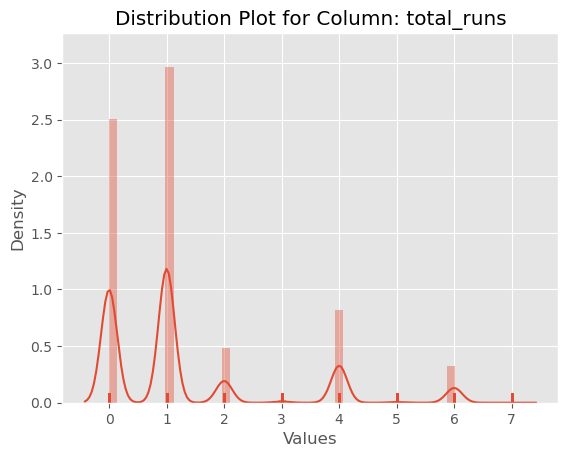

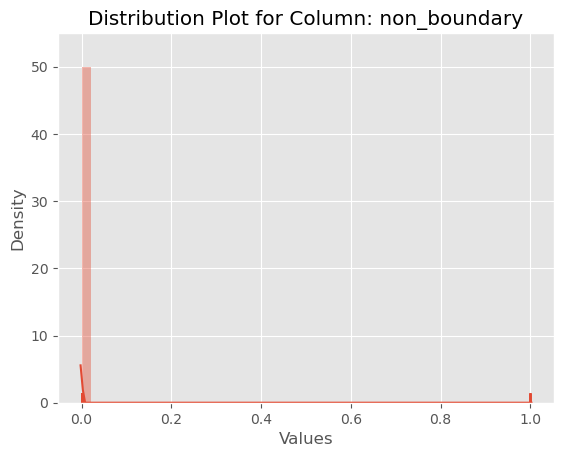

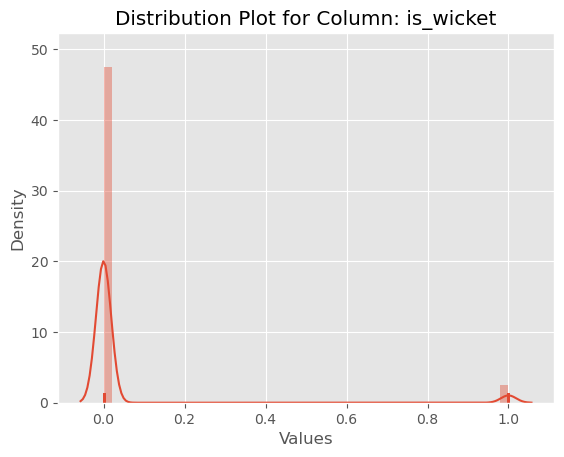

In [14]:
display_distribution_plots(df)

In [15]:
X = df.loc[:, df.columns!='is_wicket']

In [16]:
X.head()

,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [17]:
Y = df['is_wicket']

In [18]:
Y.value_counts()

0    183973
1      9495
Name: is_wicket, dtype: int64

# Dividing the columns by datatypes in order to encode them 

In [19]:
def divide_columns_by_datatype(df, col_list):
    obj_cols = []
    num_cols = []
    for col in col_list:
        if df[col].dtype == 'object':
            obj_cols.append(col)
        else:
            num_cols.append(col)
    return obj_cols, num_cols

In [20]:
divide_columns_by_datatype(X,X.columns)

(['batsman',
  'non_striker',
  'bowler',
  'dismissal_kind',
  'player_dismissed',
  'fielder',
  'extras_type',
  'batting_team',
  'bowling_team'],
 ['inning',
  'over',
  'ball',
  'batsman_runs',
  'extra_runs',
  'total_runs',
  'non_boundary'])

In [21]:
obj_cols = ['batsman','non_striker','bowler','dismissal_kind','player_dismissed','fielder','extras_type','batting_team','bowling_team']
obj_dict = ['label','label','label','label','label','label','label','label','label']

In [22]:
num_cols = ['inning','over','ball','batsman_runs','extra_runs','total_runs','non_boundary']
num_dict = ['one-hot','label','none','none','none','none','one-hot']

In [23]:
def create_col_encoding_dict(col_names, encodings):
    """
    Creates a dictionary where the keys are column names and values are the type of encoding.
    
    Args:
        col_names (list): List of column names to encode.
        encodings (list): List of encoding types corresponding to the column names.
                          Should be either 'one-hot' or 'ordinal'.
    
    Returns:
        dict: A dictionary where the keys are column names and values are the type of encoding.
    """
    # Create a dictionary where the keys are column names and values are encoding types
    col_encoding = {col_names[i]: encodings[i] for i in range(len(col_names))}
    
    return col_encoding

In [24]:
obj_encoding = create_col_encoding_dict(obj_cols,obj_dict)

In [25]:
num_encoding = create_col_encoding_dict(num_cols,num_dict)

In [26]:
def encode_columns(df, col_encoding):
    """
    Function to one-hot or ordinal encode specified columns in a dataframe.

    Parameters:
    df (pandas.DataFrame): the dataframe to encode
    col_encoding (dict): a dictionary where the keys are the names of columns to encode, and the values are the type of encoding ('one-hot', 'ordinal', or 'label')

    Returns:
    encoded_df (pandas.DataFrame): the encoded dataframe
    """

    # Make a copy of the original dataframe
    encoded_df = df.copy()

    # Loop over the columns to encode
    for col, encoding_type in col_encoding.items():

        # One-hot encode the column
        if encoding_type == 'one-hot':
            encoder = OneHotEncoder(sparse=False, drop='first')
            encoded_col = encoder.fit_transform(encoded_df[[col]])
           
            # Create a dataframe from the encoded column
            encoded_col_df = pd.DataFrame(encoded_col, columns=[f"{col}_{i}" for i in range(encoded_col.shape[1])])
            # Add the encoded columns to the dataframe and drop the original column
            encoded_df = pd.concat([encoded_df, encoded_col_df], axis=1).drop(col, axis=1)

        # Ordinal encode the column
        elif encoding_type == 'ordinal':
            encoder = OrdinalEncoder()
            encoded_col = encoder.fit_transform(encoded_df[[col]])
            encoded_df[col] = encoded_col

        # Label encode the column
        elif encoding_type == 'label':
            encoder = LabelEncoder()
            encoded_col = encoder.fit_transform(encoded_df[[col]])
            encoded_df[col] = encoded_col
            
        # Keep the original column values as they are
        elif encoding_type == 'none':
            continue

    return encoded_df

In [27]:
df_enc_obj = encode_columns(X,obj_encoding)

In [28]:
df_encoded = encode_columns(df_enc_obj,num_encoding)

In [29]:
df_encoded.head()

,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,inning_0,non_boundary_0
0,6,5,396,77,18,1,0,1,9,506,879,5,7,13,0.0,0.0
1,6,6,77,393,18,1,0,1,9,506,879,5,7,13,0.0,0.0
2,7,1,77,393,419,0,0,0,9,506,879,5,7,13,0.0,0.0
3,7,2,77,393,419,1,0,1,9,506,879,5,7,13,0.0,0.0
4,7,3,396,77,419,1,0,1,9,506,879,5,7,13,0.0,0.0


# Checking the correlation of variables

In [30]:
df_cor = df_encoded

In [31]:
df_cor['is_wicket'] = Y

<AxesSubplot:>

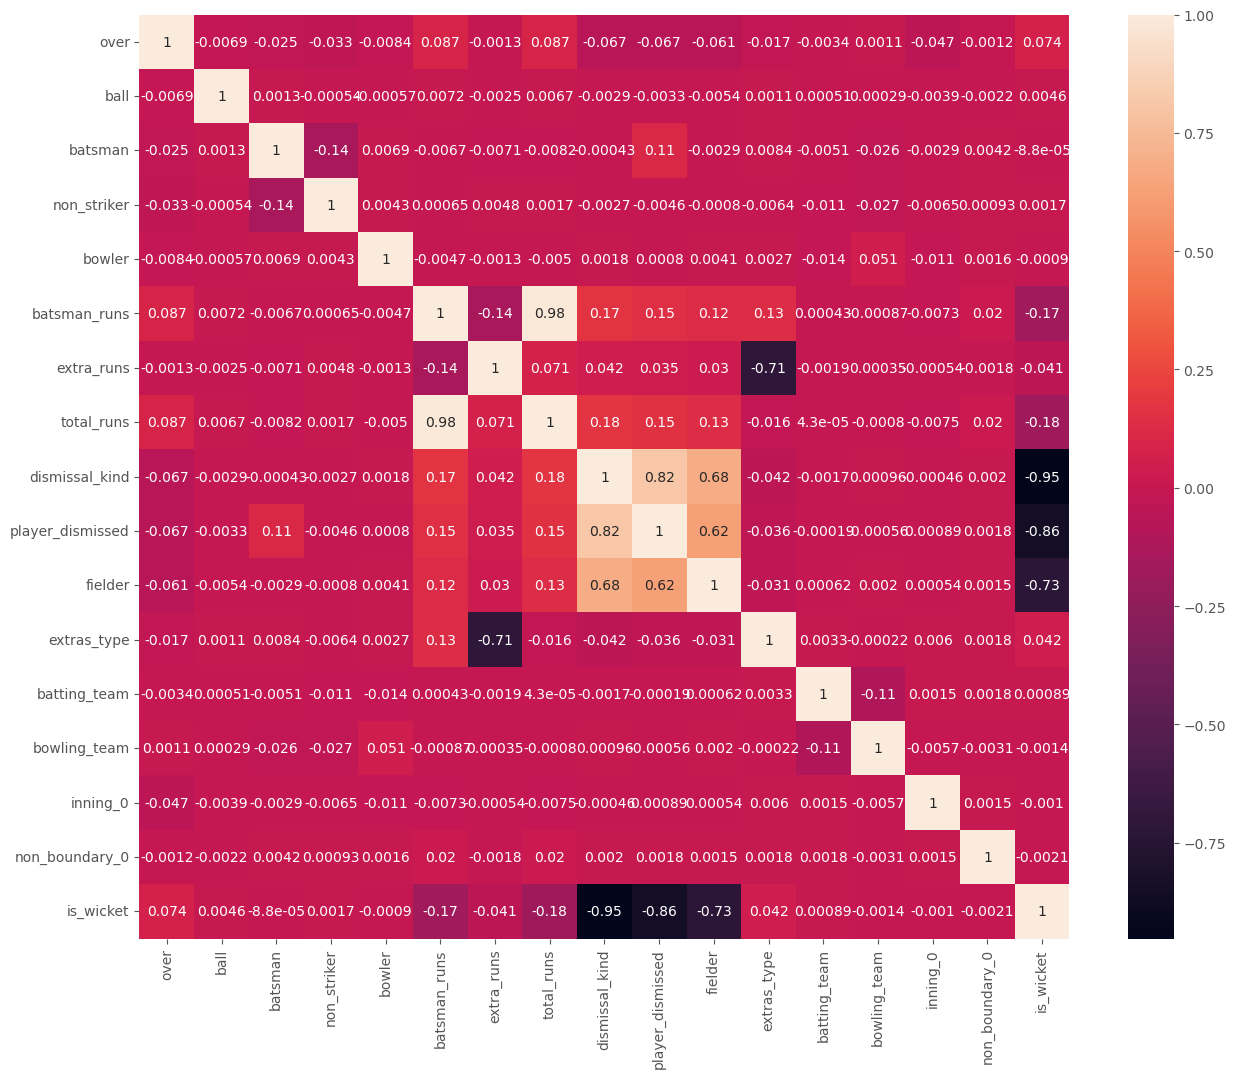

In [32]:
plt.figure(figsize=(15,12))
sns.heatmap(df_cor.corr(),annot=True)

# Since there is a very strong negative correlation between 'dismissal_kind','player_dismissed' and 'fielder' with 'is_wicket'
# We can drop them for the predictive modeling

In [34]:
df1 = df_encoded.drop(['dismissal_kind','player_dismissed','fielder','is_wicket'],axis=1)

In [35]:
print('Original dataframe shape: ',df.shape, 'New dataframe shape: ',df1.shape)

Original dataframe shape:  (193468, 17) New dataframe shape:  (193468, 13)


In [36]:
df1.isna().sum()

over              0
ball              0
batsman           0
non_striker       0
bowler            0
batsman_runs      0
extra_runs        0
total_runs        0
extras_type       0
batting_team      0
bowling_team      0
inning_0          0
non_boundary_0    0
dtype: int64

# Scaling and splitting the data

In [37]:
scaler = StandardScaler()
scaler.fit(df1)
X=scaler.transform(df1)

In [38]:
df1.head()

,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,extras_type,batting_team,bowling_team,inning_0,non_boundary_0
0,6,5,396,77,18,1,0,1,5,7,13,0.0,0.0
1,6,6,77,393,18,1,0,1,5,7,13,0.0,0.0
2,7,1,77,393,419,0,0,0,5,7,13,0.0,0.0
3,7,2,77,393,419,1,0,1,5,7,13,0.0,0.0
4,7,3,396,77,419,1,0,1,5,7,13,0.0,0.0


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify = Y,random_state=100)

# Decision Tree Classifier

In [ ]:
# Define Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Define the hyperparameters to search
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Define the GridSearchCV object
grid_search = GridSearchCV(estimator=dtc, param_grid=params, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Training Accuracy:  0.9512515021902903
Testing Accuracy:  0.9512327492634517
Classification Report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     36795
           1       0.62      0.02      0.03      1899

    accuracy                           0.95     38694
   macro avg       0.79      0.51      0.50     38694
weighted avg       0.94      0.95      0.93     38694

[[36776    19]
 [ 1868    31]] : Confusion Matrix


<AxesSubplot:>

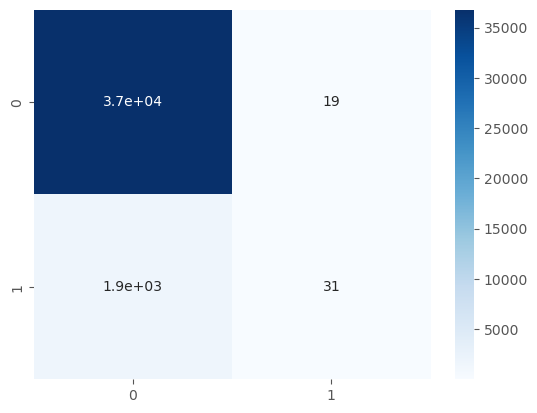

In [41]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_leaf=1, min_samples_split=2)

dtc.fit(X_train,Y_train)
dtc.score(X_test,Y_test)

Y_pred = dtc.predict(X_test)
Y_pred_proba = dtc.predict_proba(X_test)[:,1]

train_acc = accuracy_score(Y_train, dtc.predict(X_train))
test_acc = accuracy_score(Y_test, Y_pred)
clf_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test,Y_pred)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)
print("Classification Report \n",clf_report)
print(cm, ": Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="Blues")

# While the accuracy of this model is good its recall and f-1 is very low for accurately predicted when a wicket will be taken

# Logistic Regression Model

Training Accuracy:  0.9509219894814375
Testing Accuracy:  0.9509226236625834
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     36795
           1       0.00      0.00      0.00      1899

    accuracy                           0.95     38694
   macro avg       0.48      0.50      0.49     38694
weighted avg       0.90      0.95      0.93     38694

[[36795     0]
 [ 1899     0]] : Confusion Matrix


Text(0.5, 1.0, 'Confusion matrix')

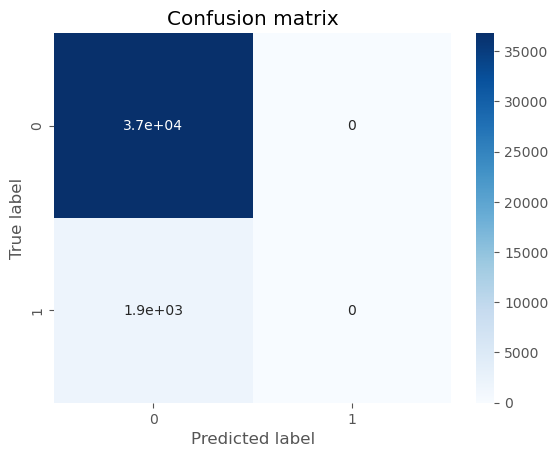

In [42]:
model=LogisticRegression().fit(X_train,Y_train)

Y_pred = model.predict(X_test)
Y_pred_prob = model.predict_proba(X_test)[:,1]

train_acc = accuracy_score(Y_train, model.predict(X_train))
test_acc = accuracy_score(Y_test, Y_pred)
clf_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test,Y_pred)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)
print("Classification Report: \n", clf_report)
print(cm, ": Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')

Text(0.5, 1.0, 'Logistic Regression Predictions')

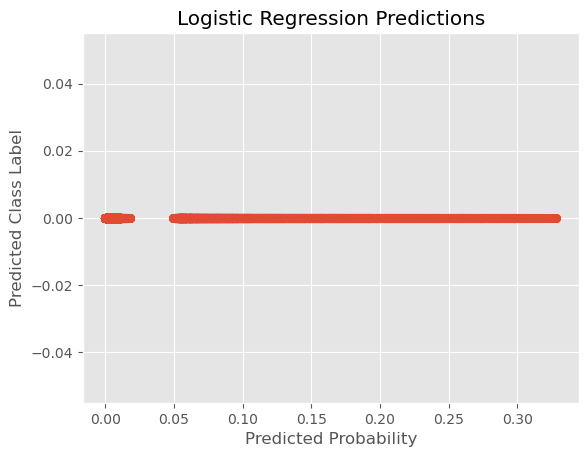

In [43]:
plt.scatter(Y_pred_prob, Y_pred)
plt.xlabel("Predicted Probability")
plt.ylabel("Predicted Class Label")
plt.title("Logistic Regression Predictions")

# We see similar results with Logistic Regression as well, however this model is completely unable to identify any True Negatives unlike the Decision Tree Classifier

# This is because our target variable is very imbalanced

# KNN

In [47]:
#selecting the optimal value of k
params = {"n_neighbors":range(1,21)}
gsv=GridSearchCV(KNeighborsClassifier(),params).fit(X_train,Y_train)

print("The optimum number of neighbors are :",gsv.best_params_)
print("The best score is :",gsv.best_score_)

The optimum number of neighbors are : {'n_neighbors': 18}
The best score is : 0.9508832235644146


Training Accuracy:  0.9510124439505343
Testing Accuracy:  0.9510001550628004
Classification Report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     36795
           1       0.64      0.00      0.01      1899

    accuracy                           0.95     38694
   macro avg       0.79      0.50      0.49     38694
weighted avg       0.94      0.95      0.93     38694

[[36791     4]
 [ 1892     7]] : Confusion Matrix


<AxesSubplot:>

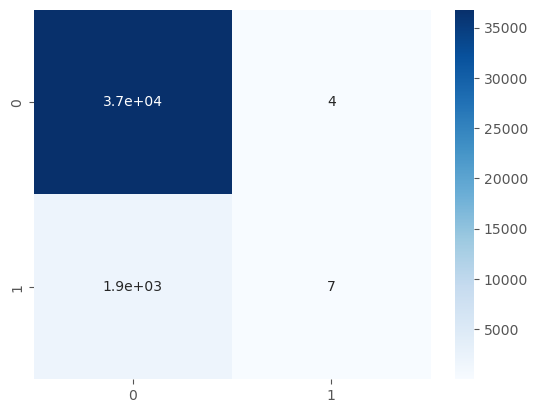

In [48]:
#KNN 
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

Y_pred = knn.predict(X_test)
Y_pred_proba = knn.predict_proba(X_test)[:,1]

train_acc = accuracy_score(Y_train, knn.predict(X_train))
test_acc = accuracy_score(Y_test, Y_pred)
clf_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test,Y_pred)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)
print("Classification Report \n",clf_report)
print(cm, ": Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="Blues")

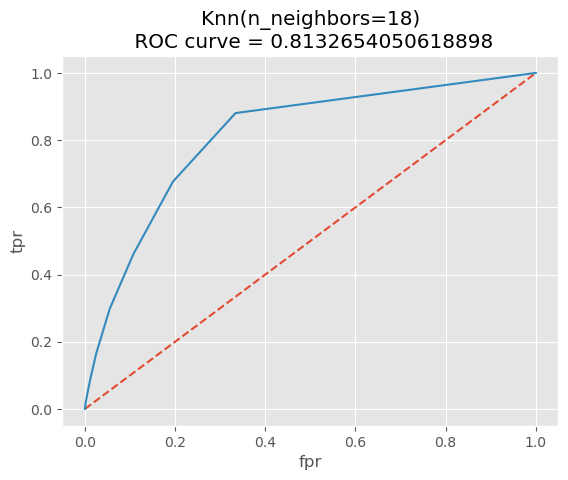

In [52]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=18)\n ROC curve = ' + str(roc_auc_score(Y_test,Y_pred_proba)))
plt.show()

# Here our model has performed better than Logistics Regression but slightly worse than Decision Tree Classifier

# Conclusion: For this dataset we can use the Decision Tree Classifier to predict with 95% accuracy whether a cricketer in the IPL will be dismissed.

There are however a few points we should take into consideration:
1) Since the Precsion, Recall & F1-score are low for when a cricketer will be dismissed this model is not completely generalised. 
- This is due to lack of impactful data such as which is the dominant hand of the batsmen and baller, what type is the bowler etc.
- The target data is obviously imbalanced as factually it is more likely that batsmen will be 'not out' rather than 'out'.I may revisit handling the imbalanced target at a later stage

2) Maybe further Hyperparameter Tuning or applying different Classification Algorithms may give us better accuraccy or atleast a more generalized model

# Linear Regression

# While this is clearly a Classification model we will still attempt a Linear Regression model to see what sort of results we get

In [55]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)


r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)
r2 = r2_score(Y_test, Y_test_pred)

# Number of features
k = X_train.shape[1]
# Number of observations
n = len(Y_train)


adj_r2_train = 1 - (1-r2_train)*(n-1)/(n-k-1)
adj_r2_test = 1 - (1-r2_test)*(n-1)/(n-k-1)
adj_r2 = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)

mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)
mse = mean_squared_error(Y_test, Y_test_pred)

rmse_train = math.sqrt(mse_train)
rmse_test = math.sqrt(mse_test)
rmse = mean_squared_error(Y_test, Y_test_pred, squared=False)

mae_train = mean_absolute_error(Y_train, Y_train_pred)
mae_test = mean_absolute_error(Y_test, Y_test_pred)
mae = mean_absolute_error(Y_test, Y_test_pred)

# Print the results
print('R Square for training set:', r2_train)
print('R Square for testing  set:', r2_test, '\n')
print('Adjusted R Square for training set:', adj_r2_train)
print('Adjusted R Square for testing  set:', adj_r2_test, '\n')
print('Mean Squared Error for training set:', mse_train)
print('Mean Squared Error for testing  set:', mse_test, '\n')
print('Root Mean Squared Error for training set:', rmse_train)
print('Root Mean Squared Error for testing  set:', rmse_test,'\n')
print('Mean Absolute Error for training set:', mae_train)
print('Mean Absolute Error for testing  set:', mae_test, '\n')

# Create table
metrics = pd.DataFrame({'MAE': [mae],'MSE': [mse],'RMSE': [rmse],'R-Squared': [r2],'Adjusted R-Squared': [adj_r2]})
                        
# Print table
print(metrics)

R Square for training set: 0.04226978295518857
R Square for testing  set: 0.042296836270393046 

Adjusted R Square for training set: 0.042189332626799025
Adjusted R Square for testing  set: 0.0422163882145099 

Mean Squared Error for training set: 0.04469665570951786
Mean Squared Error for testing  set: 0.0446948454067275 

Root Mean Squared Error for training set: 0.21141583599512564
Root Mean Squared Error for testing  set: 0.21141155457242045 

Mean Absolute Error for training set: 0.09997286628776655
Mean Absolute Error for testing  set: 0.09981271116167828 

        MAE       MSE      RMSE  R-Squared  Adjusted R-Squared
0  0.099813  0.044695  0.211412   0.042297            0.041975


Text(0.5, 1.0, 'Adjusted R-squared = 0.04')

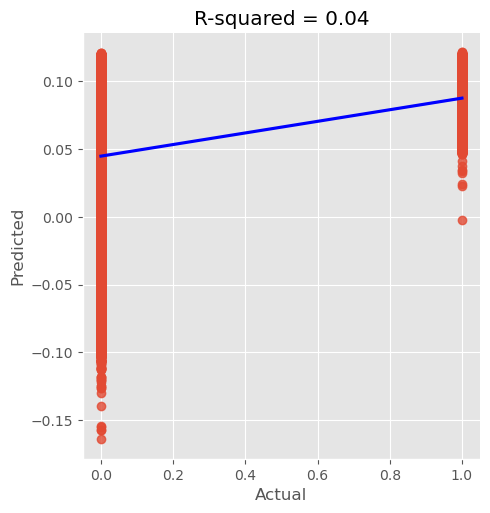

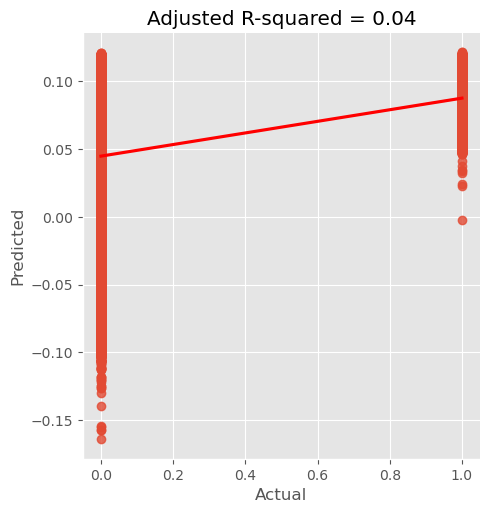

In [62]:
# Create a dataframe with the actual and predicted values
df_plt = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})

# Plot R-squared
sns.lmplot(x='Actual', y='Predicted', data=df_plt, line_kws={'color': 'blue'})
plt.title(f"R-squared = {r2:.2f}")

# Plot Adjusted R-squared
sns.lmplot(x='Actual', y='Predicted', data=df_plt, line_kws={'color': 'red'})
plt.title(f"Adjusted R-squared = {adj_r2:.2f}")

# Ridge Regression

In [40]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='r2',cv=5)
ridge_regressor.fit(X,Y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
0.04203555716073968


In [43]:
ridge_pred = ridge_regressor.predict(X_test)

In [45]:
(Y_test - ridge_pred).mean()

0.00017619654801246927

# Lasso

In [41]:
lasso = Lasso()
l_parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso,l_parameters,scoring='r2',cv=5)
lasso_regressor.fit(X,Y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
0.042035435666360456


In [42]:
lasso_pred = lasso_regressor.predict(X_test)

In [44]:
(Y_test - lasso_pred).mean()

0.0001762765734375725

# With an R2_score of 0.04 we can conclusively say that the Linear Regression performs awfully

# Conclusion

LOGISTIC REGRESSION can accurate whether or not a player will get dismissed with upto 98% accuracy.